Now that we have the data in one place we'll start building some visulaization to see what we have

First we'll bring in the modules we'll need:

In [170]:
import sqlite3                     #Bring in Sqlite for the database

from os import listdir             #Bring in OS to read all the files
from os.path import isfile, join  

import pandas as pd                #Bring in Pandas to work wiht the data
import matplotlib.pyplot as plt    #Bring in matplotlib to run visualizations
import matplotlib.dates as mdates
import numpy as np                 #Bring in numpy for math operations

import time
from datetime import date
from datetime import datetime

Next we'll bring in the data from the SQLite database.  Make sure the 'FracFocus_Database' script has been run successfully before moving to this part.

First we'll make a connection to the database

In [174]:
mypath = "C:/Users/BWeaver/Google Drive/FracFocus/FracFocus"  #make sure the use back slashes or double forward slashes '\\'
conn = sqlite3.connect(mypath + '/FracFocus.sqlite')
cur = conn.cursor()

Next we'll pull data from the database.  We'll use SQL to pull data from Wyoming and take the following columns:

JobStartDate, JobEndDate, APINumber, StateNumber, CountyNumber, OperatorName, WellName, Latitude, Longitude, Projection, TVD, TotalBaseWaterVolume, TotalBaseNonWaterVolume, StateName, CountyName.

This will help keep the data set smaller

In [172]:
Wyoming_Data = pd.read_sql_query("""SELECT JobStartDate, JobEndDate, APINumber, StateNumber, CountyNumber, OperatorName, 
                      WellName, Latitude, Longitude, Projection, TVD, TotalBaseWaterVolume, 
                      TotalBaseNonWaterVolume, StateName, CountyName from FracFocusRegistry
            WHERE     StateNumber = 49 """, conn)

Now we'll view the top 10 rows to see what we brought in

In [176]:
print('Number of rows:',Wyoming_Data.size, '\n')
Wyoming_Data.head(10)

Number of rows: 1318605 



,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,TVD,TotalBaseWaterVolume,TotalBaseNonWaterVolume,StateName,CountyName
0,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
1,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
2,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
3,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
4,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
5,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
6,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
7,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
8,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse
9,2015-01-02,2015-01-10 23:45:00,49009295270000,49,9,"Chesapeake Operating, Inc.",BFU 21-35-76 ST A SN 3H,42.995733,-105.978255,NAD27,7308.0,4650001.0,442773.0,Wyoming,Converse


Now that we have the data in a panda object let's make some changes to it.  First we need to get JobStartDate and JobEndDate data type fixed.  We'll convert that to a datetime object

In [175]:
Wyoming_Data['JobStartDate'] = pd.to_datetime(Wyoming_Data['JobStartDate'])
Wyoming_Data['JobEndDate'] = pd.to_datetime(Wyoming_Data['JobEndDate'])

Let's see what that looks like:

In [177]:
Wyoming_Data[['JobStartDate', 'JobEndDate', 'OperatorName' ]].head(10)

,JobStartDate,JobEndDate,OperatorName
0,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
1,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
2,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
3,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
4,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
5,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
6,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
7,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
8,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."
9,2015-01-02,2015-01-10 23:45:00,"Chesapeake Operating, Inc."


Now that we have the dates corrected let's look at how many submissions we have over time

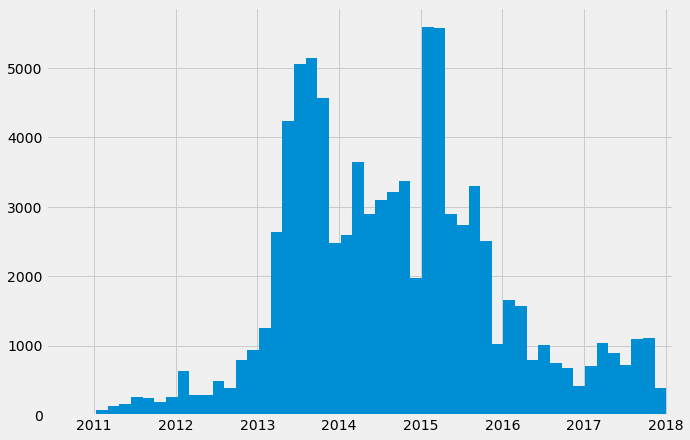

In [178]:
fig, ax = plt.subplots()                                    #Setup the plot
fig.set_size_inches(10, 7)                                  #Set the figure size
plt.style.use('fivethirtyeight')                            #Set the style, I'm a sucker for fivethirtyeight plots
min_x = datetime.strptime('2010-06-01','%Y-%m-%d').date()   #set the Min date on the x-axis 
max_x = datetime.strptime('2018-02-01','%Y-%m-%d').date()   #Set the Max date on the x-axis
ax.set_xlim(min_x, max_x)
ax.hist(Wyoming_Data['JobEndDate'].values, bins = 250)      #Set the Historgram paramaters
plt.show()

Now let's see how many by operator

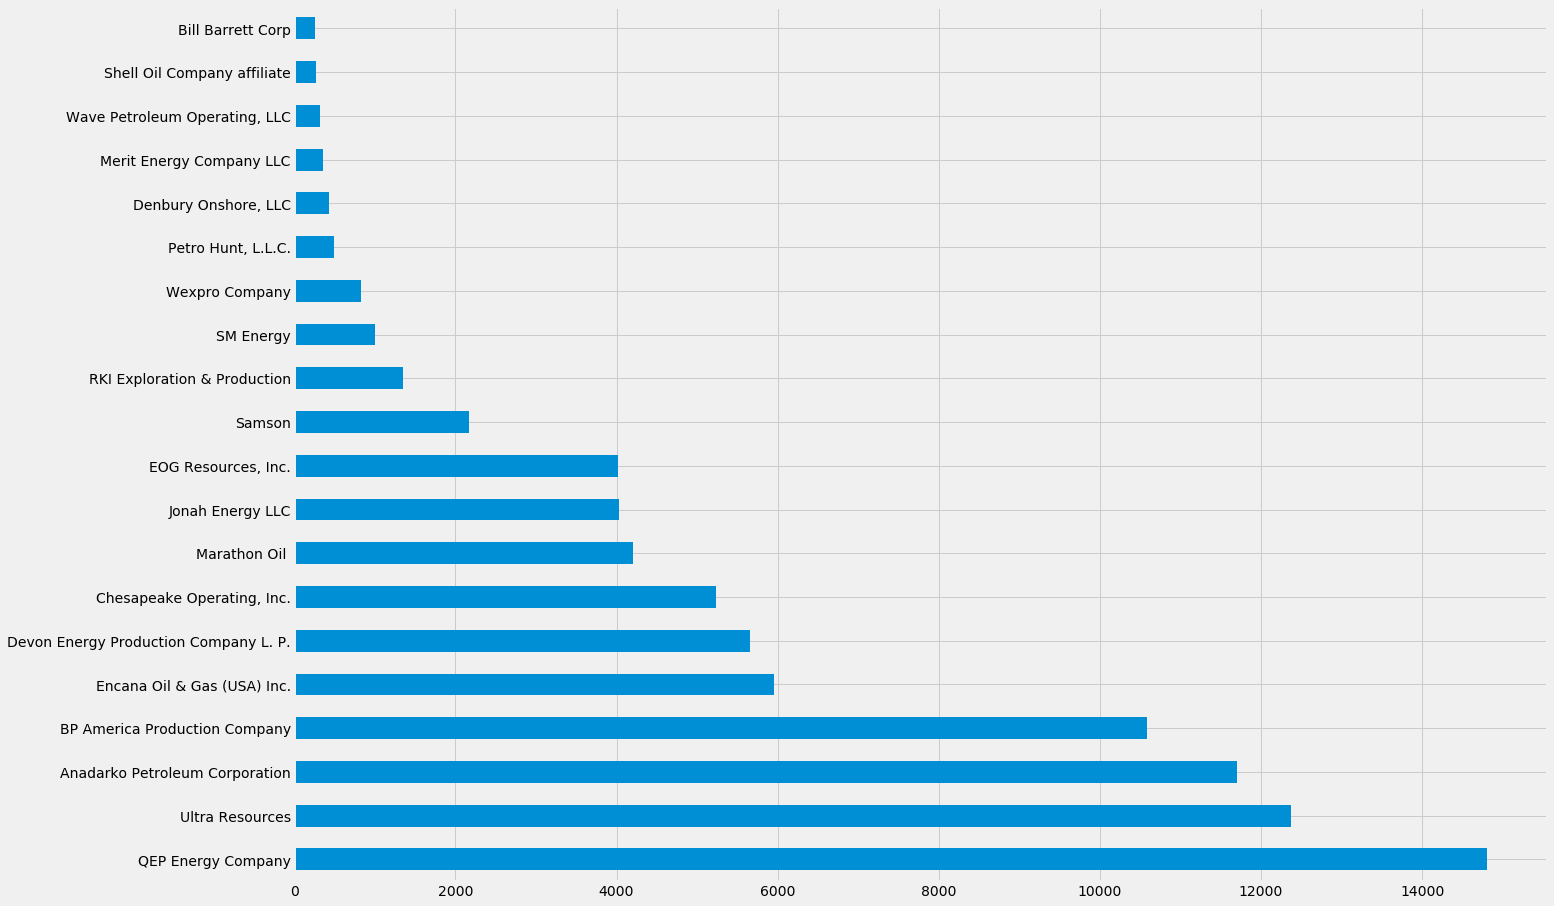

In [182]:
Wyoming_Data['OperatorName'].value_counts()[:20].plot(kind='barh')
plt.show()